### 03 Keras (케라스)

📌딥러닝 준비

1-1 주요 용어
- 하이퍼파라미터 (Hyperparameter)
    * 사용자가 직접 설정해는 설정 값
    * 학습 속도, 반복 횟수, ...
- 과소적합 vs 과대적합 (Underfitting vs Overfitting)
- 에포크 (Epoch)
    * 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프
- 손실 함수 (Loss function)
    * binary_crossentropy : 이진 분류
    * categorical_crossentropy : 다중 분류 (클래스가 원-핫 벡터인 경우)
    * sparse_categorical_crossentropy : 다중 분류 (클래스가 레이블 값인 경우)

In [2]:
import tensorflow as tf

In [3]:
# 클래스
tf.losses.BinaryCrossentropy()

# 함수
tf.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

- 경사하강법 (Gradient descent)
    * 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법

1-2 딥러닝 프로세스
1. 데이터 전처리
2. 모델 생성
3. 모델 컴파일
4. 모델 훈련
5. 모델 검증
6. 모델 예측

📌단순 신경망 훈련
- 단순 선형 회귀 모델

In [4]:
import numpy as np

In [5]:
# 샘플 데이터 생성
x = np.arange(1, 6)

# y = 3 * x + 2
y = 3 * x + 2

print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


In [6]:
import matplotlib.pyplot as plt

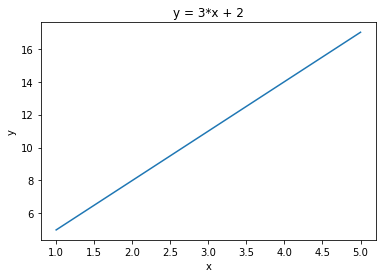

In [7]:
# 시각화
plt.plot(x, y)
plt.title('y = 3*x + 2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

🔹Sequential API 사용해 모델 구성

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()

In [10]:
# 단순선형회귀모델 정의
# x값을 나타내는 입력 변수 1개 존재 --> input_shape = [1]
model.add(Dense(1, input_shape = [1]))

In [11]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 컴파일
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

In [13]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 237ms/step - loss: 77.5018 - mae: 8.2893
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 45.2941 - mae: 6.3798
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 26.5241 - mae: 4.9220
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 15.5850 - mae: 3.8090
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 9.2094 - mae: 2.9592


🔹위 모델은 과소적합 상태

In [14]:
model = Sequential()
model.add(Dense(1, input_shape = (1,)))

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

history = model.fit(x, y, epochs = 1200)

Epoch 1/1200
1/1 [==============================] - 0s 215ms/step - loss: 229.7217 - mae: 14.0516
Epoch 2/1200
1/1 [==============================] - 0s 3ms/step - loss: 133.9212 - mae: 10.7592
Epoch 3/1200
1/1 [==============================] - 0s 3ms/step - loss: 78.0930 - mae: 8.2457
Epoch 4/1200
1/1 [==============================] - 0s 2ms/step - loss: 45.5588 - mae: 6.3269
Epoch 5/1200
1/1 [==============================] - 0s 3ms/step - loss: 26.5991 - mae: 4.8620
Epoch 6/1200
1/1 [==============================] - 0s 3ms/step - loss: 15.5501 - mae: 3.7436
Epoch 7/1200
1/1 [==============================] - 0s 3ms/step - loss: 9.1108 - mae: 2.8898
Epoch 8/1200
1/1 [==============================] - 0s 4ms/step - loss: 5.3581 - mae: 2.2378
Epoch 9/1200
1/1 [==============================] - 0s 4ms/step - loss: 3.1708 - mae: 1.7400
Epoch 10/1200
1/1 [==============================] - 0s 5ms/step - loss: 1.8959 - mae: 1.3599
Epoch 11/1200
1/1 [==============================] - 0s 5

In [15]:
import pandas as pd

pd.DataFrame(history.history)

,loss,mae
0,229.721725,14.051554
1,133.921188,10.759181
2,78.093048,8.245737
3,45.558815,6.326911
4,26.599142,4.862007
...,...,...
1195,0.000038,0.005273
1196,0.000037,0.005255
1197,0.000037,0.005237
1198,0.000037,0.005220


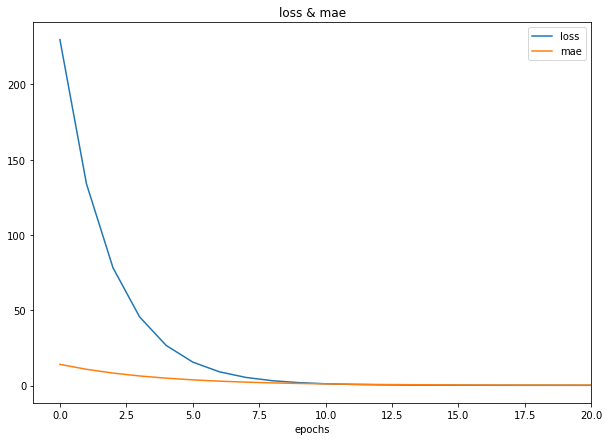

In [16]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.xlim(-1, 20)
plt.title('loss & mae')
plt.xlabel('epochs')
plt.show()

In [17]:
# 검증
model.evaluate(x, y)

# [loss, mae] 출력

1/1 [==============================] - 0s 98ms/step - loss: 3.6480e-05 - mae: 0.0052


[3.648005804279819e-05, 0.005184173583984375]

In [18]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 83ms/step


array([[32.025055]], dtype=float32)

In [19]:
print(3 * 10 + 2)

32


🔹x = 10일 때 y = 32임을 감안한다면 정답에 꽤 근사한 값을 예측한 것을 볼 수 있음

📌 심층 신경망으로 이미지 분류

In [20]:
# 케라스 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [21]:
(X_tr, y_tr), (X_te, y_te) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [22]:
# 데이터셋 확인
print('train set: ', X_tr.shape, y_tr.shape)
print('test set: ', X_te.shape, y_te.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


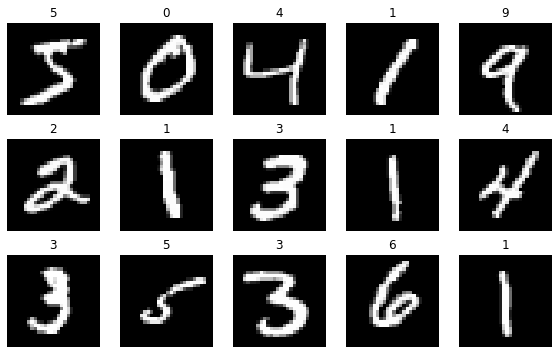

In [23]:
# 데이터 시각화
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    ax.imshow(X_tr[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_tr[i]))

plt.tight_layout()
plt.show()

In [24]:
# 데이터 전처리
print(f'정규화 전] 최소값: {X_tr.min()}, 정규화 전] 최댓값: {X_tr.max()}')

X_tr = X_tr / X_tr.max()

print(f'정규화 후] 최소값: {X_tr.min()}, 정규화 후] 최댓값: {X_tr.max()}')

정규화 전] 최소값: 0, 정규화 전] 최댓값: 255
정규화 후] 최소값: 0.0, 정규화 후] 최댓값: 1.0


In [25]:
X_te = X_te / 255

In [26]:
X_te

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [27]:
X_tr.shape

(60000, 28, 28)

In [28]:
print(f'변경 전 shape: {X_tr.shape}')
print(f'1D으로 shape 변경 후 : {X_tr.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후 : (60000, 784)


In [29]:
print(f'변경 전 shape: {X_tr.shape}')
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(X_tr).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


In [30]:
# relu 활성화 함수 적용
tf.keras.layers.Dense(128, activation='relu')

In [31]:
from tensorflow.keras.layers import Flatten

In [32]:
model = Sequential()
# input layer
model.add(Flatten(input_shape=(28, 28)))

# hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
# 출력층 노드가 1인 경우
Dense(1, activation='sigmoid')

# 출력층 노드가 2개 이상인 경우
Dense(10, activation='softmax')

In [ ]:
# 손실함수
# 이진 분류
model.compile(loss='binary_crossentropy')

In [ ]:
# y가 원-핫 벡터인 경우
model.compile(loss='categorical_crossentropy')

# y가 원-핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

In [34]:
# 옵티마이저
from tensorflow.keras.optimizers import Adam

In [35]:
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam)

In [36]:
# 평가 지표
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# 훈련
model.fit(X_tr, y_tr,
          validation_data=(X_te, y_te),
          epochs=10,)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2308 - acc: 0.9310 - val_loss: 0.1169 - val_acc: 0.9631
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0976 - acc: 0.9696 - val_loss: 0.0891 - val_acc: 0.9745
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0668 - acc: 0.9789 - val_loss: 0.0727 - val_acc: 0.9768
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0516 - acc: 0.9839 - val_loss: 0.0870 - val_acc: 0.9734
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0399 - acc: 0.9872 - val_loss: 0.0882 - val_acc: 0.9742
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0341 - acc: 0.9887 - val_loss: 0.0829 - val_acc: 0.9756
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0295 - acc: 0.9902 - val_loss: 0.0697 - val_acc: 0.9792
Epoch 8/10
1875/1875 [==============================] - 3s 1ms

In [38]:
# 평가
test_loss, test_acc = model.evaluate(X_te, y_te)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 0s 783us/step - loss: 0.0927 - acc: 0.9792
검증 셋 정확도: 0.979200005531311


In [39]:
# 예측
predictions = model.predict(X_te)

313/313 [==============================] - 0s 648us/step


In [40]:
predictions[0]

array([1.9788983e-08, 2.4952831e-10, 1.5832741e-08, 1.3227634e-07,
       2.4208605e-10, 3.2648564e-11, 1.9729460e-13, 9.9999952e-01,
       3.8726327e-08, 2.6687525e-07], dtype=float32)

In [41]:
# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

7


In [42]:
# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

[7 2 1 0 4 1 4 9 5 9]


In [43]:
# 데이터 시각화
def get_one_result(idx):
    img, y_true, y_pred, confidence = X_te[idx], y_te[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence

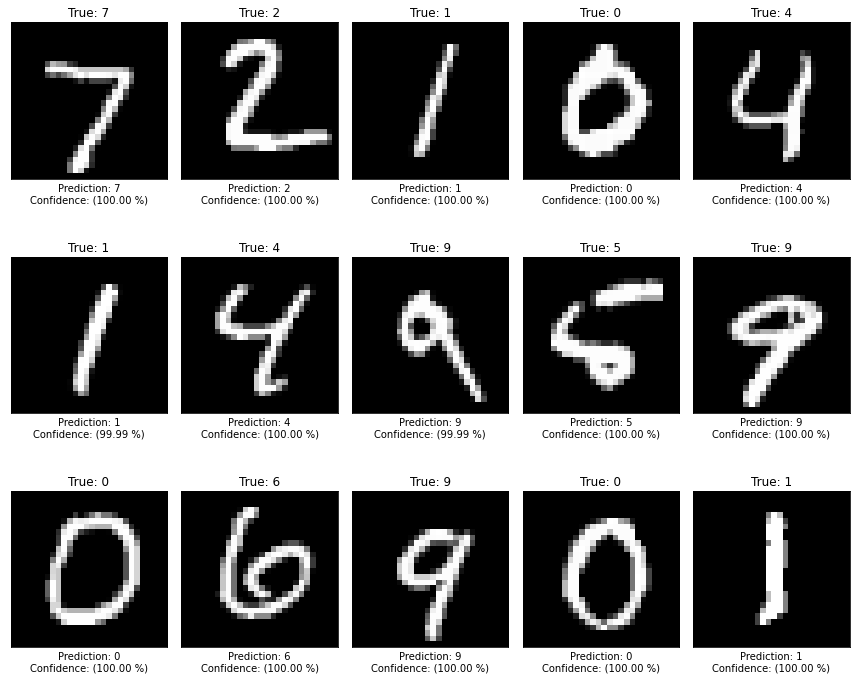

In [44]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)

    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()